# <h2 style='text-align:center;font-family:times new roman MS;font-size:40px;background-color:coral;border:20px;color:white'>Technocolabs Mini Project: Bigmart Sales Dataset<h2>
# <h2 style='text-align:center;font-family:times new roman;font-size:40px;background-color:coral;border:20px;color:white'>Author: Sibgha Munir<h2>

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ5giJqwHM3QPu5r6wyYq-J6OIVmmU2Z-Bs1g&usqp=CAU)

<h2 style='text-align:center;font-size:20px;font-family:times new roman;background-color:coral;border:20px;color:white'> Table of Contents<h2>

## 1. Introduction
## 2. Data Id
## 3. Libraries
## 4. File path
## 5. Preprocessing and Data Analysis
## 6. Machine learning models
## 7. Conclusion

# Introducion

### Problem Statement:
The sales data for 1559 products in 10 different stores located in various cities for the year 2013 has been gathered by the data scientists at BigMart. Each product possesses distinct characteristics that distinguish it from other products.

### Breakdown of the Problem Statement:
The problem at hand involves supervised machine learning, where the goal is to predict the value of the target variable, which in this case is referred to as "Item_Outlet_Sales."

### Aim of the NoteBook:
The aim is to develop a predictive model that can estimate the sales of each product in every store. By utilizing this model, BigMart intends to gain insights into the specific attributes of both products and stores that significantly impact sales growth. 

![](https://media3.giphy.com/media/KzmyU9ge5rIawBBf9X/200w.webp?cid=ecf05e47ztuoodshsikdzhhqtzfcey8gcvfeosk6j0ihcbdn&rid=200w.webp)

# Data Id 📋

This dataset is named [BigMart Sales]. The dataset contains a set of **8,523 records** under **12 attributes**:


| Column Name                         | Description                                                    |
|------------------                   |----------------------------------------------------------------|
| `Item_Identifier`                   | Unique product ID                                              |
| `Item_Weight`                       | Weight of product                                              |
| `Item_Fat_Content`                  | Checks the Concentration of fat in the product                 |
| `Item_Visibility`                   | The % of total display area of all similar products in a store |
| `Item_Type`                         | Product Category                                               |
| `Item_MRP`                          | Maximum Retail Price for a Product                             |
| `Outlet_Identifier`                 | Store ID                                                       |
| `Outlet_Establishment_Year`         | The year in which store was established                        |
| `Outlet_Size`                       | The size of the store (Area Size Category)                     |
| `Outlet_Location_Type`              | In Terms of city Tiers (Size)                                  |
| `Outlet_Type`                       | Grocery store or a type of    supermarket                      |
| `Item_Outlet_Sales`                 | Sales of the product In the Specific outlet                    |

# Libraries 📕📗📘

![](https://media3.giphy.com/media/7E8lI6TkLrvvAcPXso/200w.webp?cid=ecf05e47gdqv5pdj8vy567mreujdobhq7nm0jwq3pjjdlqj0&rid=200w.webp)

In [10]:
import csv # creates table-like custom objects from the items in CSV files
import numpy as np # linear algebra
import pandas as pd # data processing

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns


20

# File Paths 📂
![](https://media4.giphy.com/media/ENeLuI1PyqUnJv4NMl/200w.gif?cid=6c09b952s1cycx07626fn7g0a1sxit5fv8gdc35z48vpauic&ep=v1_gifs_search&rid=200w.gif&ct=g)


In [16]:
# path for the training set
train_path ="D:\Internship Technocolabs\Project 1\Dataset\Train.csv"

#path for the testing set
test_path = "D:\Internship Technocolabs\Project 1\Dataset\Test.csv"

# Preprocessing and Data Analysis 💻

## First look at the data:
Training set:

In [17]:
# read in csv file as a DataFrame
train_df = pd.read_csv(train_path)

# explore the first 5 rows
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Testing set:

In [18]:
# read in csv file as a DataFrame
test_df = pd.read_csv(test_path)

# explore the first 5 rows
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Size of each data set:

In [19]:
print(f"Training set (row, col): {train_df.shape}\n\nTesting set (row, col): {test_df.shape}")

Training set (row, col): (8523, 12)

Testing set (row, col): (5681, 11)


### Preprocessing of the training dataset

In [20]:
#Column Metadata
train_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_120\3075650861.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  train_df.info(verbose=True, null_counts=True)


In [21]:
# Descriptive Analysis of test
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [22]:
# Descriptive Analysis of train
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Missing values 🚫

There are many ways data can end up with missing values. For example:
1. The product wasn't weighed.
2. The data provider didn't include the outlet size of some products.

Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. As you can see we have some missing data, let's have a look how many we have for each column:

* by numbers
* by %

This analysis will also compare to the test and train datasets for evaluation.

In [31]:
#checking null values

print("Train:\n")
print(train_df.isnull().sum().sort_values(ascending=False),"\n\n",train_df.isnull().sum()/train_df.shape[0] *100,"\n\n")
print("Test:\n")
print(test_df.isnull().sum().sort_values(ascending=False),"\n\n",test_df.isnull().sum()/test_df.shape[0] *100,"\n\n")

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

We can see the % of each missing Values per columns is almost identical!

| column           | size |
|------------------|------|
| `Outlet_Size`    | 28%  |
| `Item_Weight`    | 17%  |

### Check the value counts for `Outlet_Size` and `Item_Weight`:

In [32]:
print("Outlet_Size:\n", train_df.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", train_df.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 




`Outlet_Size` is a categorical column, therefore we will impute missing values with `Medium` the **mode value**

In [33]:
print("test mode, train mode\n",[train_df['Outlet_Size'].mode().values[0], test_df['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [34]:
#train
train_df['Outlet_Size'] = train_df['Outlet_Size'].fillna(
train_df['Outlet_Size'].dropna().mode().values[0])

#test
test_df['Outlet_Size'] = test_df['Outlet_Size'].fillna(
test_df['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
train_df['Outlet_Size'].isnull().sum(),test_df['Outlet_Size'].isnull().sum()

(0, 0)

To gain a clearer understanding of the distribution of the "item_weight" column, it would be beneficial to visualize it using a boxplot from the seaborn library.

  <tr><td>
    <img src="https://miro.medium.com/max/1050/1*2c21SkzJMf3frPXPAR_gZA.png"
         width="400" height="300">
      <tr><td align="LEFT">

Text(0.5, 1.0, 'Item_Weight Boxplot')

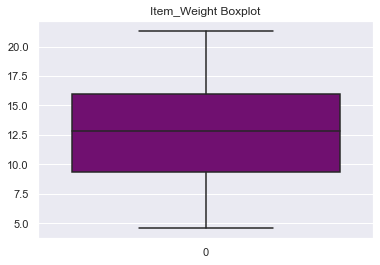

In [110]:
# I would like to visualize the "item_weight" column using a vertical boxplot with a purple color scheme, as per my preference.
sns.boxplot(data=train_df['Item_Weight'],orient="v", color = 'purple')
plt.title("Item_Weight Boxplot")

Since there are no outliers in the "item_weight" column, the most efficient approach would be to fill the missing data with the mean value of the column.

In [39]:
#train
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(
train_df['Item_Weight'].dropna().mean())

#test
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(
test_df['Item_Weight'].dropna().mean())

#checking if we filled missing values
train_df['Item_Weight'].isnull().sum(),test_df['Item_Weight'].isnull().sum()

(0, 0)

By using the `.info()` method, we can observe that all missing data has been successfully filled for both the train and test datasets.

In [41]:
print("train:\n")
print(train_df.info())

print("\n\ntest:\n")
print(test_df.info())

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


test:

<class 'pandas.core.fra

## Data Exploration

![](https://media2.giphy.com/media/JrXas5ecb4FkwbFpIE/200w.gif?cid=6c09b952u5gbl9iydv84vfs55ua04u01xkcaso8limwzmmgj&ep=v1_gifs_search&rid=200w.gif&ct=g)

To begin with, we can split our data into categorical and numerical data by utilizing the `.select_dtypes('dtype').columns.to_list()` combination.

In [42]:
#list of all the numeric columns
numerical = train_df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
categorical = train_df.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  train_df[numerical]

#categoric df
BM_cat = train_df[categorical]

print(numerical)
print(categorical)

[train_df[category].value_counts() for category in categorical[1:]]

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

Upon observation, it is apparent that the "Item_Fat_Content" column contains repeating values with different names. To address this, we will correct the values using the `.replace()` method.

In [43]:
#train
train_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
test_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
train_df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Let's review our data once again to further analyze its characteristics and make any necessary observations.

In [44]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


The "Outlet_Establishment_Year" column is not particularly useful in its current form. To derive more meaningful information, we can create a new column called "Outlet_Age" that represents the age of the outlet.

In [45]:
#creating our new column for both datasets
train_df['Outlet_Age'], test_df['Outlet_Age']= train_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), test_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

train_df['Outlet_Age'].head
test_df['Outlet_Age'].head

<bound method NDFrame.head of 0       21
1       13
2       22
3       13
4       35
        ..
5676    23
5677    11
5678    18
5679    13
5680    18
Name: Outlet_Age, Length: 5681, dtype: int64>

## Data Visualization 📊

### Univariate Plots
To begin with, we will generate countplots to visualize the distribution of the categorical columns in our data.

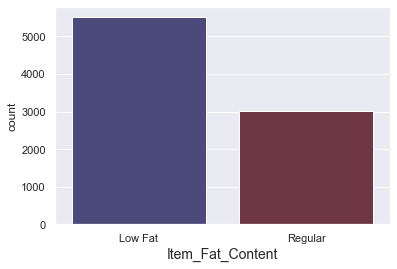

In [51]:
#categorical columns:

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
 
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=train_df ,palette='icefire')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

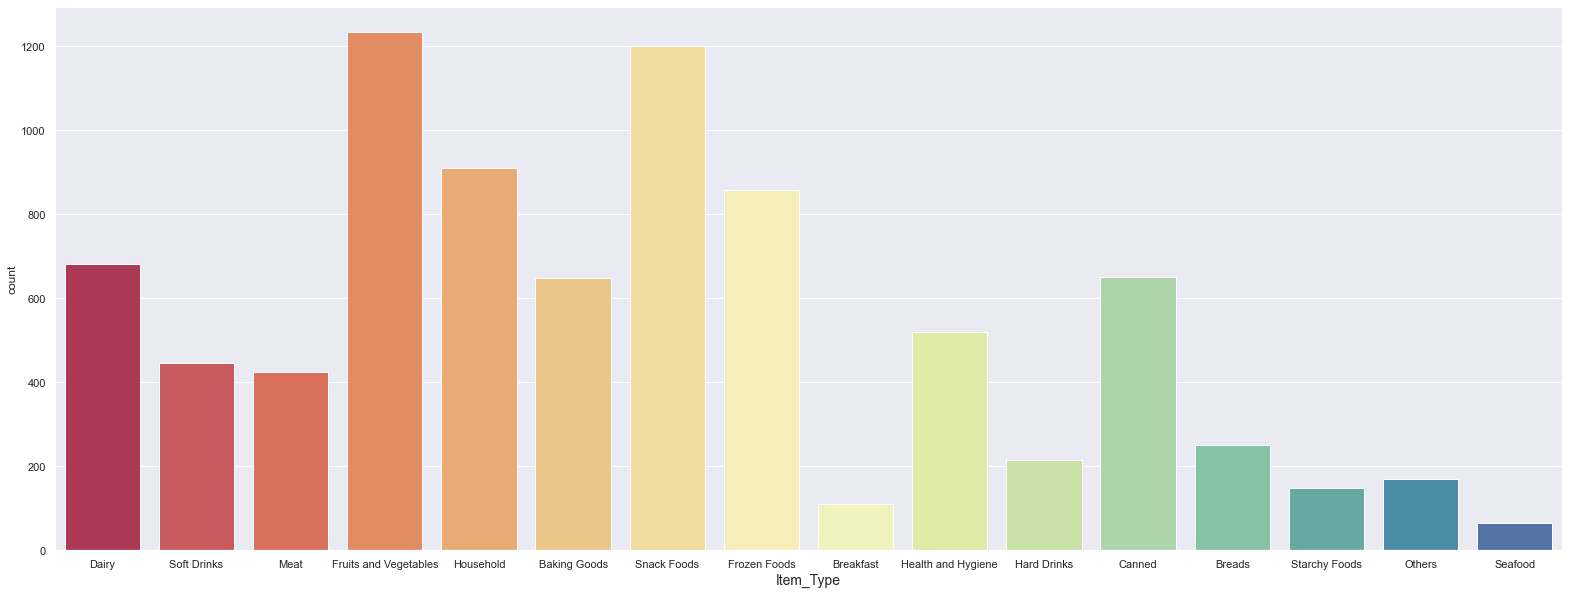

In [61]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=train_df ,palette='Spectral')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

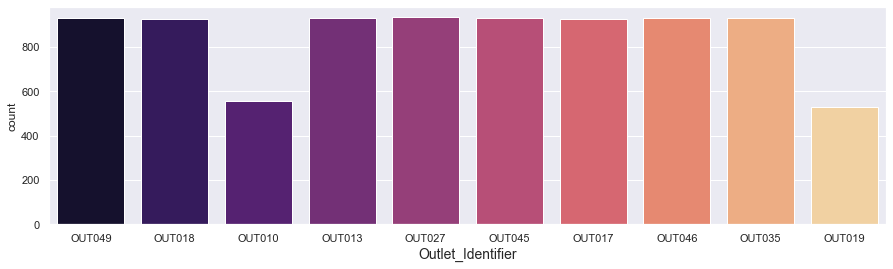

In [62]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=train_df ,palette='magma')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

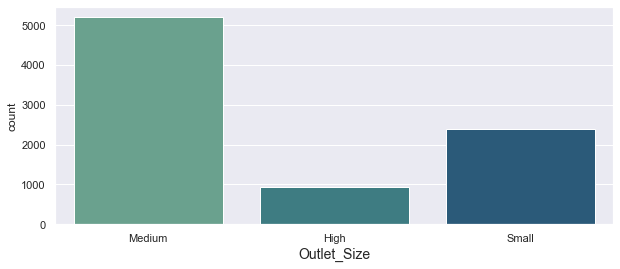

In [63]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=train_df ,palette='crest')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

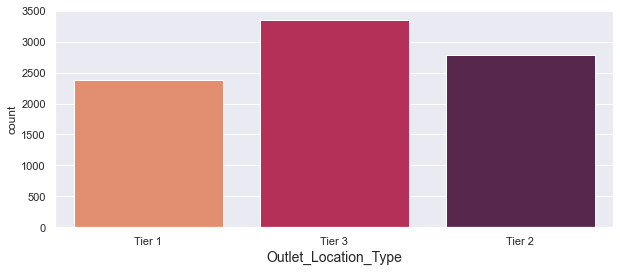

In [64]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=train_df ,palette='rocket_r')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

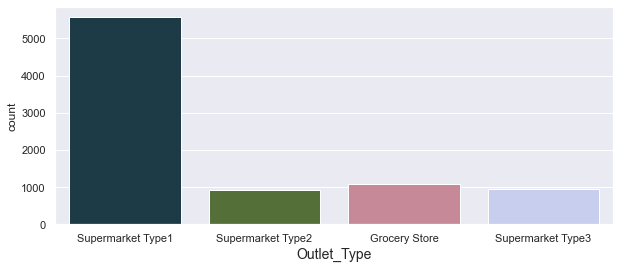

In [66]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=train_df ,palette='cubehelix')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

#### Realizations from Categorical Columns:

* `Item_Fat_Content` - The majority of items sold are labeled as "low fat".
* `Item_Type` - Popular item types include "fruits and vegetables" and "snack foods".
* `Outlet_Identifier` - Sales are relatively evenly distributed across most outlets, except for "OUT010" and "OUT019", which have significantly lower sales.
* `Outlet_Size` - Most BigMart outlets in the dataset are of medium size.
* `Outlet_Location_Type` - The most common location type is "Tier3".
* `Outlet_Type` - The predominant outlet type by a wide margin is "Supermarket Type1".

Now let's move on to the numerical columns:

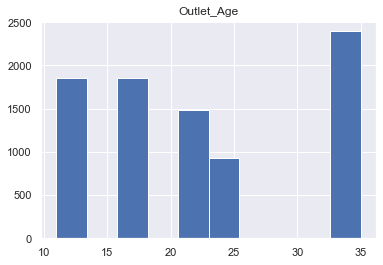

In [67]:
#list of all the numeric columns
numerical = train_df.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  train_df[numerical]

plt.hist(train_df['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

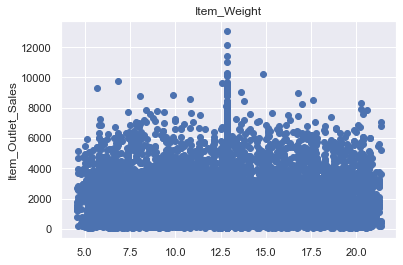

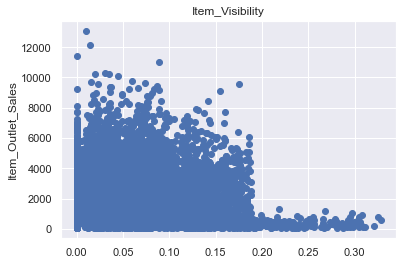

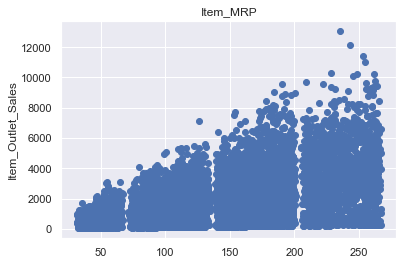

In [69]:
# Due to the variability of unique values in the numerical columns, it would be beneficial to create scatter plots with the target value to visualize any potential relationships or patterns.

for numeric in BM_num[numerical[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

#### Realizations from Numeric Columns:

* `Outlet_Age` - The majority of outlets are 35 years old.
* `Item_Weight` - The data distribution is highly varied, showing no specific pattern.
* `Item_Visibility` - The distribution is also diverse, but there is some concentration around (0,0), suggesting that items with low visibility may not sell well in certain cases.
* `Item_MRP` - Items with higher maximum retail prices (MRP) generally tend to have better sales.

These observations provide insights into the characteristics and trends within the numeric columns of the data.

### multivariate plots
I would like to examine the relationships between the "Item_Outlet_Sales" and the following variables:
* Sales per item type
* Sales per outlet
* Sales per outlet type
* Sales per outlet size
* Sales per location type

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


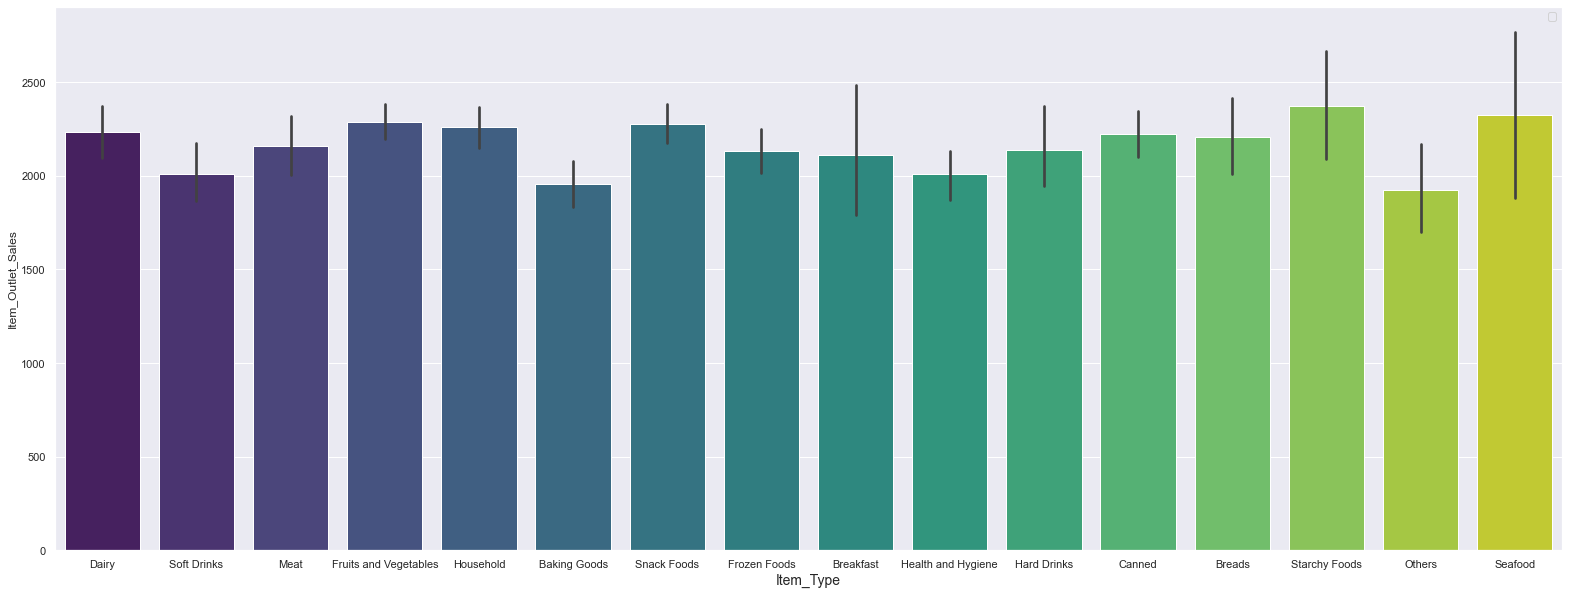

In [72]:
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=train_df ,palette='viridis')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


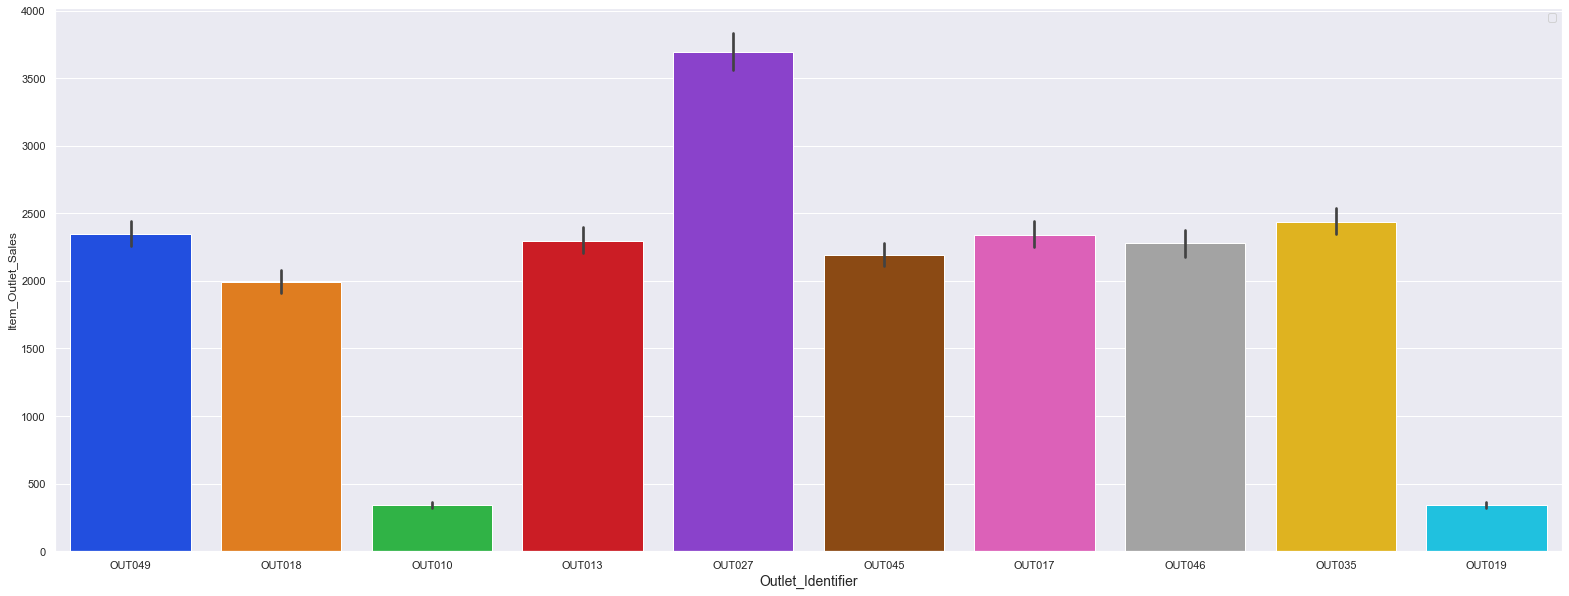

In [73]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=train_df ,palette='bright')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


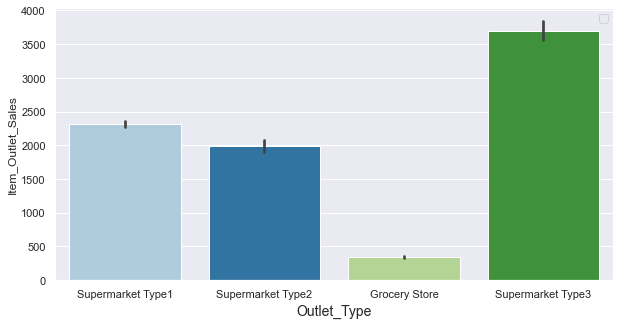

In [74]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=train_df ,palette='Paired')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


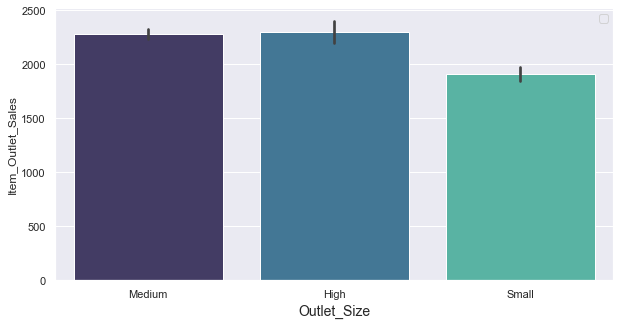

In [76]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=train_df ,palette='mako')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


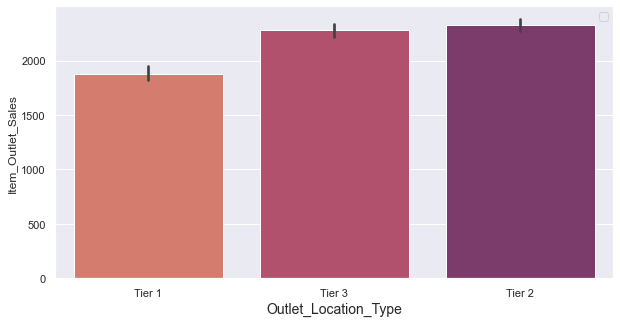

In [77]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=train_df ,palette='flare')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

#### Realizations:

Upon analyzing the relationship between "Item_Outlet_Sales" and various variables, the following observations can be made:

* There is minimal variation in item types concerning sales.
* Outlet 27 generates the highest sales, and there are substantial differences in sales among specific outlets.
* Surprisingly, "Supermarket Type3" is the most profitable, surpassing "Supermarket Type1".
* Medium and high outlet sizes exhibit similar levels of sales.
* Tier 2 and Tier 3 locations have comparable sales, with Tier 2 slightly surpassing Tier 3.

These findings shed light on the associations between "Item_Outlet_Sales" and the specified variables, providing valuable insights into the dataset.

### Corraltion Matrix


<AxesSubplot:>

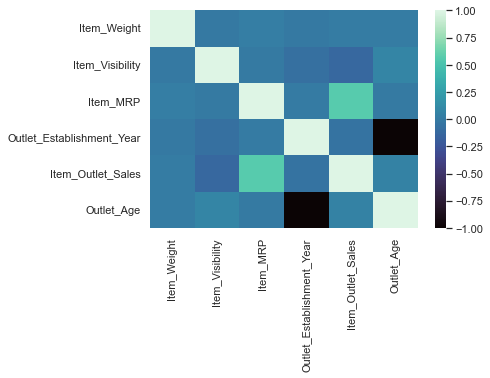

In [82]:
# plotting the correlation matrix

sns.heatmap(train_df.corr() ,cmap='mako')

The analysis reveals a strong correlation between "Item_Outlet_Sales" and "Item_MRP".

### Feature Engineering

In the feature engineering process, the following decisions have been made for the categorical and numeric variables:

**Categorical Values**:

We have identified 7 columns that require deletion or encoding.

* Ordinal Variables:
    * `Item_Fat_Content`
    * `Outlet_Size`
    * `Outlet_Location_Type`

* Nominal Variables:
    * `Item_Identifier`
    * `Item_Type`
    * `Outlet_Identifier`
    * `Outlet_Type`

**Numeric Values**:

* The column `Outlet_Establishment_Year` is deemed unnecessary and will be dropped.

**Conclusion**:

Based on the feature engineering process, the following actions have been taken:

1. The columns `Outlet_Establishment_Year`, `Item_Identifier`, and `Outlet_Identifier` are not considered significant and will be removed from the dataset.
2. All ordinal variables will undergo label encoding.
3. The columns `Outlet_Type` and `Item_Type` will be subjected to one-hot encoding.

In [80]:
# Let's examine the count of unique values in each column of the dataset.
BM_cat.apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [83]:
#lable encoding

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    train_df[i] = le.fit_transform(train_df[i])
    test_df[i] = le.fit_transform(test_df[i])
    
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


In [87]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']

# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_oh = pd.DataFrame(OH_encoder.fit_transform(train_df[cols])).astype('int64')
test_oh = pd.DataFrame(OH_encoder.fit_transform(test_df[cols])).astype('int64')


#get feature columns
train_oh.columns = OH_encoder.get_feature_names(cols)
test_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
train_oh.index = train_df.index
test_oh.index = test_df.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
train_fe = pd.concat([train_df, train_oh], axis=1)
test_fe = pd.concat([test_df, test_oh], axis=1)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [88]:
# Dropping irrelevant columns

train_fe  = train_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
test_fe = test_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [89]:
train_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,0,0,0,0,0,0,1,0,0


# Machine learning models

![](https://media4.giphy.com/media/4TtTVTmBoXp8txRU0C/200w.webp?cid=ecf05e47hbwccgi1rqz8b91h2vj504ui7e6q02oscy461q42&rid=200w.webp)

To begin, we will split the dataset into two variables: `X`, which represents the features defined earlier, and `y`, which corresponds to the target value we aim to predict, namely the "Item_Outlet_Sales".
**Assumptions:**
Since this is a regression problem, we will employ regression methods for modeling and prediction.

To divide the dataset into training and testing sets, we will use a train-test split with a ratio of 8:2, where 80% of the data will be allocated for training and 20% for testing.
## Models we will use:

* **Linear Regression** 
* **Random Forest Regressor** 
* **Lasso Regressor** 

## The Process of Modeling the Data:

1. Importing the model

2. Fitting the model

3. Predicting Item Outlet Sales

4. Regression metrics

### Score Metrics for Regression:

* **Mean Absolute Error (MAE)**  -  Mean of the absolute value of errors (absolute distance from true value):
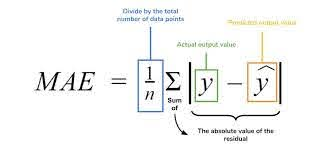

* **Mean Squared Error (MSE)**  -  Mean of the squared value of errors (squared distance from true value):
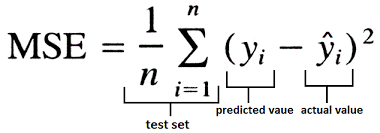

* **R^2 (coefficient of determination)**  -  Regression score function.:
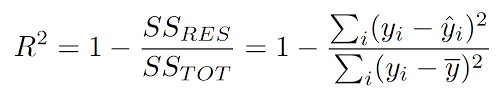 

In [90]:
y = train_fe['Item_Outlet_Sales']
X = train_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [91]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

## Linear Regression

![](https://cdn.filestackcontent.com/WCbMsxiSLW2H1SyqunQm)

Linear regression is a statistical method used to model the relationship between a dependent variable (also known as the response variable) and one or more independent variables (also known as explanatory variables or predictors). 

It assumes a linear relationship between the variables and aims to estimate the unknown parameters that define this relationship. Linear regression is widely studied and widely used in practice due to its simplicity and interpretability. It is particularly useful when the relationship between the variables can be adequately described by a linear equation, and the statistical properties of the estimated parameters are relatively easy to analyze and interpret.(more info on [wikipedia](https://en.wikipedia.org/wiki/Linear_regression)).


In [94]:
#model
LReg = LinearRegression(normalize=True)

#fit
LReg .fit(X_train, y_train)

#predict
y_predict = LReg .predict(X_test)

#score variables
LReg_MAE = round(MAE(y_test, y_predict),2)
LReg_MSE = round(MSE(y_test, y_predict),2)
LReg_R_2 = round(R2(y_test, y_predict),4)
LReg_CS  = round(CVS(LReg , X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LReg_MAE}\n")
print(f" Mean Squared Error: {LReg_MSE}\n")
print(f" R^2 Score: {LReg_R_2}\n")
cross_val(LReg ,LinearRegression(),X,y,5)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


 Mean Absolute Error: 838.41

 Mean Squared Error: 1285522.61

 R^2 Score: 0.5594

LinearRegression(normalize=True) Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression(normalize=True) score: 0.558


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

### Csv results of the test for our model:
![](https://media2.giphy.com/media/26DN2iTaW5mmmJtug/200.webp?cid=ecf05e47ceq530n5mwtmqi7lb6tg74y5k2ji2pte6j5ckita&rid=200.webp)
By accessing the generated CSV file in the designated output directory, you will be able to observe the predicted values alongside the corresponding true values in a tabular format..

In [96]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")       

## Random Forest Regressor

![](https://lh3.googleusercontent.com/proxy/V_3AWj1s3kBvrcJEUczXaoNlIVmToUBGxo_wuNSM2B3NNUs1q31KuEETmfxw3jIfiJ5H3SkjTCs9rq8BOgRZnP-ZIZBjLwVMRMchhNeV0SJQknEdTd4dhjrULXqViViMORUPWvoGMQuGYol-sj5lIEXKuHo4ouNxp3-m-sOUkzDbZ10Ph-a769ugPqsTLvJLlfhr0sbSz6Y0=s0-d)

Random forest is a type of supervised learning algorithm that utilizes ensemble learning techniques for both classification and regression tasks. It involves constructing numerous decision trees during the training phase and making predictions based on the mode of the classes (for classification) or the mean prediction of the individual trees (for regression). Random forest combines the predictions from multiple decision trees to improve overall accuracy and robustness in handling complex datasets.


In [97]:
#model
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)


 Mean Absolute Error: 1030.27

 Mean Squared Error: 1964025.66

 R^2 Score: 0.3268

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.54
0.52
0.55
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5491


### Csv results of the test for our model:
![](https://media2.giphy.com/media/26DN2iTaW5mmmJtug/200.webp?cid=ecf05e47ceq530n5mwtmqi7lb6tg74y5k2ji2pte6j5ckita&rid=200.webp)
By accessing the generated CSV file in the designated output directory, you will be able to observe the predicted values alongside the corresponding true values in a tabular format..

In [98]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")     

## Lasso Regressor

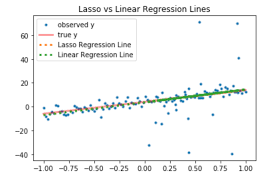

Lasso, also known as the least absolute shrinkage and selection operator, is a regression analysis technique used in statistics and machine learning. It serves the dual purpose of variable selection and regularization to improve the predictive accuracy and interpretability of the resulting statistical model. Lasso achieves this by adding a penalty term to the regression equation, which encourages sparse solutions by shrinking the coefficients of less relevant features towards zero. This helps in identifying the most important features for the prediction task, enhancing both the model's performance and interpretability.- more info on [wikipedia.](https://en.wikipedia.org/wiki/Lasso_(statistics)) 


In [99]:
#model
LS = Lasso(alpha = 0.05)
#fit
LS.fit(X_train,y_train)

#predict
y_predict = LS.predict(X_test)

#score variables
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LS, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(LS,Lasso(alpha = 0.05),X,y,5)

 Mean Absolute Error: 838.07

 Mean Squared Error: 1285554.86

 R^2 Score: 0.5594

Lasso(alpha=0.05) Scores:
0.57
0.55
0.55
0.56
0.56
Average Lasso(alpha=0.05) score: 0.5581


### Csv results of the test for our model:
![](https://media2.giphy.com/media/26DN2iTaW5mmmJtug/200.webp?cid=ecf05e47ceq530n5mwtmqi7lb6tg74y5k2ji2pte6j5ckita&rid=200.webp)
By accessing the generated CSV file in the designated output directory, you will be able to observe the predicted values alongside the corresponding true values in a tabular format..

In [100]:
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Lasso_Regressor.to_csv("Lasso Regressor.csv")     

# Conclusion

![](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExYzgzYzg2Y2E2Mzg5YTMzNDE5NjY0Yzc0Yjg5ZWJkMTY3NDkwNmQ3ZiZlcD12MV9pbnRlcm5hbF9naWZzX2dpZklkJmN0PXM/62HN9PUaLFot0O3mH6/giphy.gif)

In [103]:
MAE= [LReg_MAE,RFR_MAE,LS_MAE]
MSE= [LReg_MSE,RFR_MSE,LS_MSE]
R_2= [LReg_R_2,RFR_R_2,LS_R_2]
Cross_score= [LReg_CS,RFR_CS,LS_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
2,Lasso Regressor,838.07,1285554.86,0.5594,0.5581
0,Linear Regression,838.41,1285522.61,0.5594,0.5580
1,Random Forest Regressor,1030.27,1964025.66,0.3268,0.5920


## Key Findings

After analyzing the data and evaluating different models, the following insights have been discovered:

* The variable `Item_MRP` has a positive correlation with the target variable, indicating that higher maximum retail prices tend to lead to increased outlet sales.
* Both Linear Regression and Lasso Regressor models exhibit superior performance across various categories.
* The Random Forest Regressor model, despite having a higher cross-validation score, only explains about a third of the observed variation in the target variable. Therefore, its performance is suboptimal compared to the other models.
* To enhance the performance of the models, further tuning is required, such as utilizing techniques like Grid Search for parameter optimization.

These realizations provide valuable information for understanding the relationships between variables, identifying the best-performing models, and highlighting areas for potential model improvement through tuning and optimization.

# <h2 style='text-align:center;font-family:times new roman;font-size:40px;background-color:coral;border:20px;color:white'>Please Upvote and Comment!🔼<h2>
![](https://steemitimages.com/0x0/https://i.imgsafe.org/bc/bc1fe07bc3.gif)
    


![](https://i.pinimg.com/originals/65/d4/a3/65d4a33521f6f15d4b8f3b5cdeaec29d.gif) 
![](https://cdn.pixabay.com/animation/2022/10/05/02/38/02-38-46-625_512.gif) 